#  Практика 1
## Наборы данных по вариантам
Вариант №2. https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset

Набор данных о продажах кофе

In [ ]:
# Установка зависимостей
!pip install pandas matplotlib seaborn

In [9]:
# 1. Импорт данных и библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Coffe_sales.csv")

In [ ]:
# 2. Информация о данных, их структура и первичный обзор.
df.head() # вывод первых 5 строк


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [10]:
df.info() # типы данных и количество не-null значений в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [11]:
df.describe() # статистика для числовых и категориальных переменных

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [12]:
df.columns # Список столбцов и их типов данных

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

## Определение типов переменных

In [15]:
# Список столбцов и их типов данных
df.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


## Статистический разбор данных

1. **Посчитайте количество уникальных значений для каждой переменной:**

In [16]:
# Количество уникальных значений
for col in df.columns:
    print(f"{col}: {df[col].nunique()} уникальных значений")

hour_of_day: 17 уникальных значений
cash_type: 1 уникальных значений
money: 13 уникальных значений
coffee_name: 8 уникальных значений
Time_of_Day: 3 уникальных значений
Weekday: 7 уникальных значений
Month_name: 12 уникальных значений
Weekdaysort: 7 уникальных значений
Monthsort: 12 уникальных значений
Date: 381 уникальных значений
Time: 3547 уникальных значений


**⏰ задача**

Определить типы переменных
- номинальные переменные (не имеют порядка и сравнения)
- порядковые пиеременные (имеют порядок, но не имеют смысла мат операции)
- числовые непрерывные переменные (имеют порядок, есть смысл мат операций)

Вывести статистику для числовых и для категоиральных перменных раздельно.

p.s. если существует несколько гипотез к какому типу относительно одна и та же переменной - объяснить почему

# Типы переменных
**hour_of_day:** час покупки (0–23), имеет порядок, если использовать только для сортировки и анализа периодичности — можно считать порядковой.

**cash_type:** номинальная переменная, способ оплаты

**money:**	числовая(непрерывная) переменная, сумма транзакции

**coffee_name:** номинальная переменная, тип купленного кофе

**Time_of_Day:**	порядковая переменная, время суток (утро, день, вечер), естественный порядок есть, но мат. операции неприменимы

**Weekday:**	порядковая переменная, день недели

**Month_name:**	порядковая переменная, месяц покупки

**Weekdaysort:**	порядковая переменная,	номер дня недели, отображает порядок, также можно использовать как категорию или порядковую переменную. Если использовать для мат. операций — числовая.

**Monthsort:**	порядковая переменная, номер месяца, отображает порядок, также можно использовать как категорию или порядковую переменную. Если использовать для мат. операций — числовая.

**Date:**	порядковая переменная, дата (год, месяц, число), можно использовать в анализе как временную ось

**Time:**	порядковая переменная, время заказа


In [17]:
categorical = ["cash_type", "coffee_name"]
ordinal = ["Weekday", "Month_name", "Time_of_Day", "Date", "Time", "hour_of_day", "Weekdaysort", "Monthsort"]
numeric = ["money"]

In [19]:
# статистика для числовых и категориальных переменных
df[numeric].describe()

,money
count,3547.000000
mean,31.645216
std,4.877754
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,38.700000


In [20]:
df[categorical].describe(include="all")

,cash_type,coffee_name
count,3547,3547
unique,1,8
top,card,Americano with Milk
freq,3547,809


In [22]:
df[ordinal].describe()

,hour_of_day,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000
mean,14.185791,3.845785,6.453905
std,4.234010,1.971501,3.500754
min,6.000000,1.000000,1.000000
25%,10.000000,2.000000,3.000000
50%,14.000000,4.000000,7.000000
75%,18.000000,6.000000,10.000000
max,22.000000,7.000000,12.000000


## **4. Визуализация распределения переменных**



1. **Гистограмма для числовых переменных:**

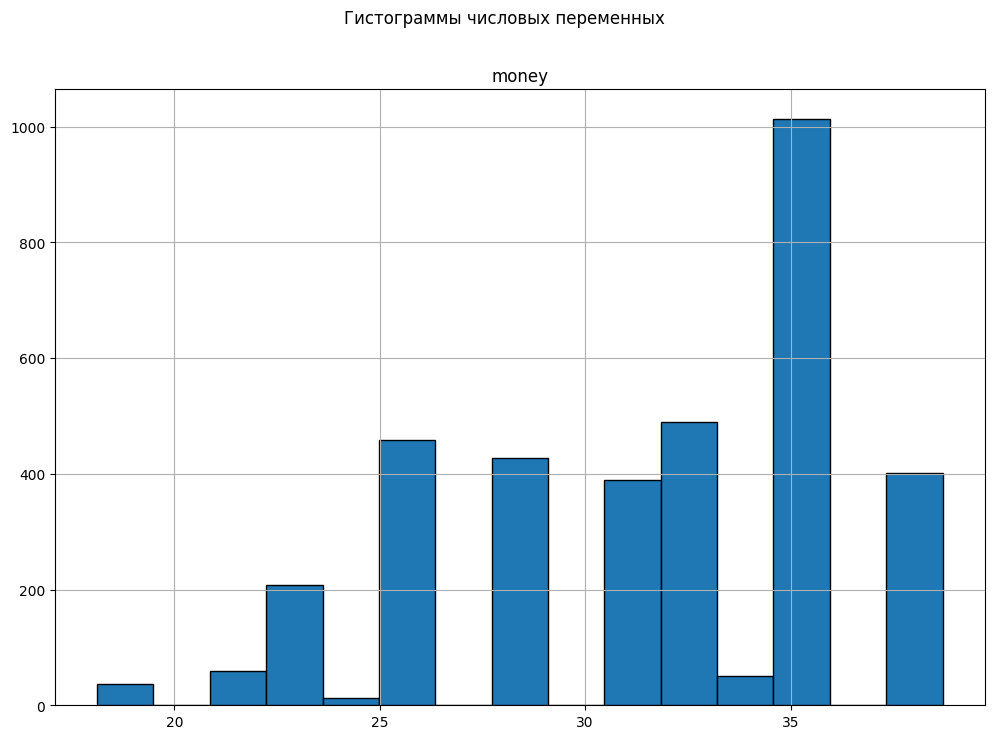

In [24]:
# Распределение числовых переменных
numeric_cols = ["money"]
# Гистограммы числовых переменных
df[numeric_cols].hist(figsize=(12, 8), bins=15, edgecolor="black")
plt.suptitle("Гистограммы числовых переменных")
plt.show()

Данная база данных позволяет полноценно анализировать стоимость кофе, но этого не достаточно для дальнейшего анализа.
Распределение суммы выглядит несимметричным и отличается от нормального. Большинство заказов приходится на значения около 35.76.

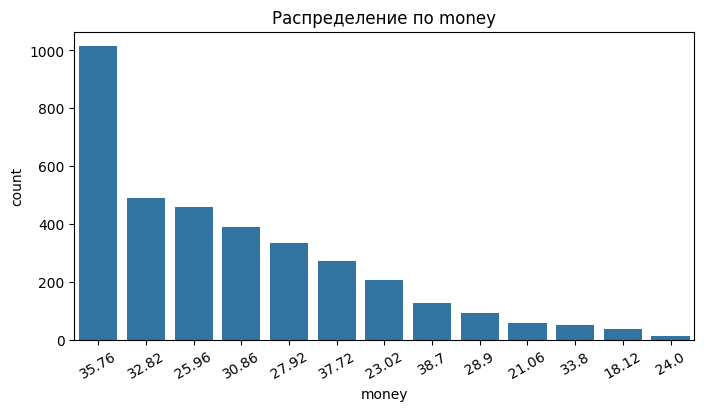

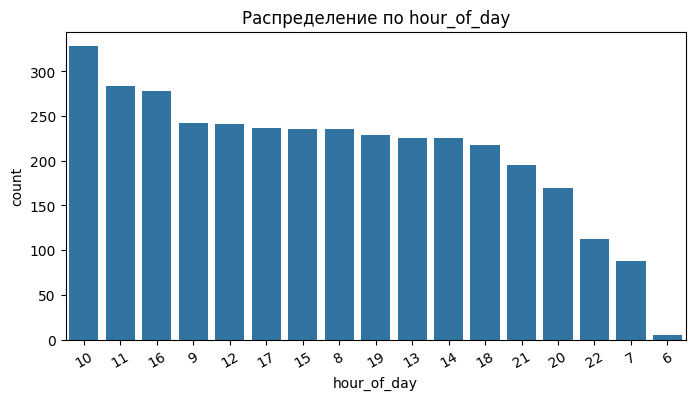

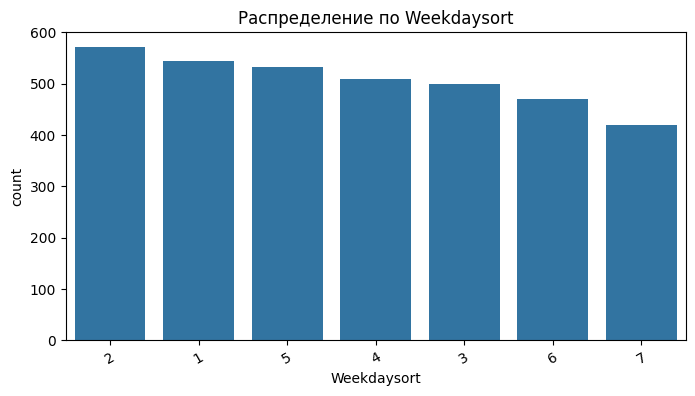

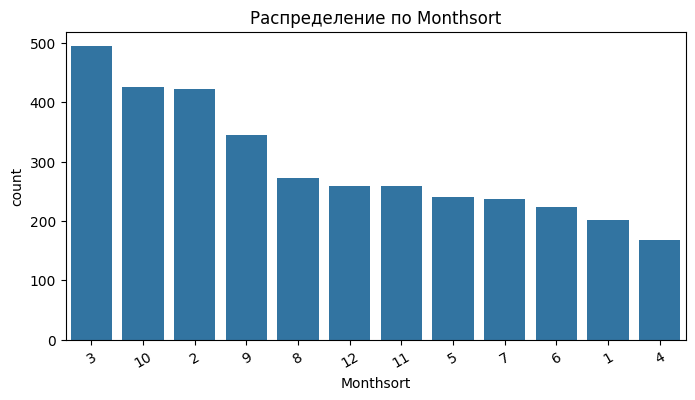

In [25]:
numeric_cols = ["money", "hour_of_day", "Weekdaysort", "Monthsort"]
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Распределение по {col}")
    plt.xticks(rotation=30)
    plt.show()

Наиболее часто кофе покупают в 10, 11, и 16 часов.
Сезонный тренд наблюдается, пиковые продажи приходятся на определённые месяцы года (например, март, октябрь и фераль).

Заказы распределены довольно равномерно, однако во вторник колличесво лидирует, а наименьшее количество заказов приходится на воскресенье.

**задача ⏰**

Описать вывод графиков.
- Является ли распределение нормальным или отлично от него?
- Концентрация большинства значений
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина)

p.s. 3-5 самых показательных примеров.

## Решение


Большинство заказов — стандартные, недорогие позиции ("Americano with Milk", "Latte", минимальные чеки).

2. **Столбчатая диаграмма для категориальной переменной `Class`:**

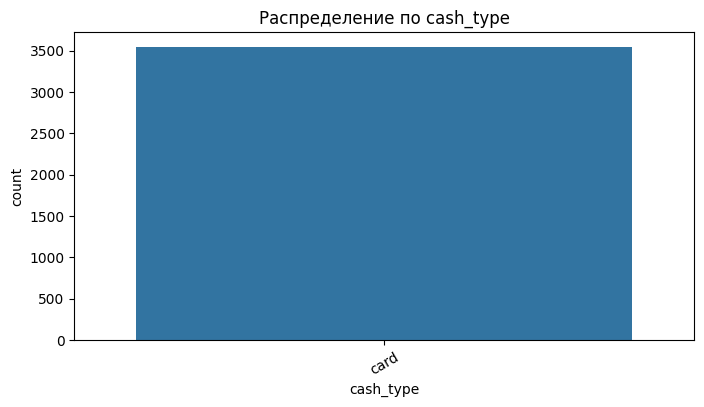

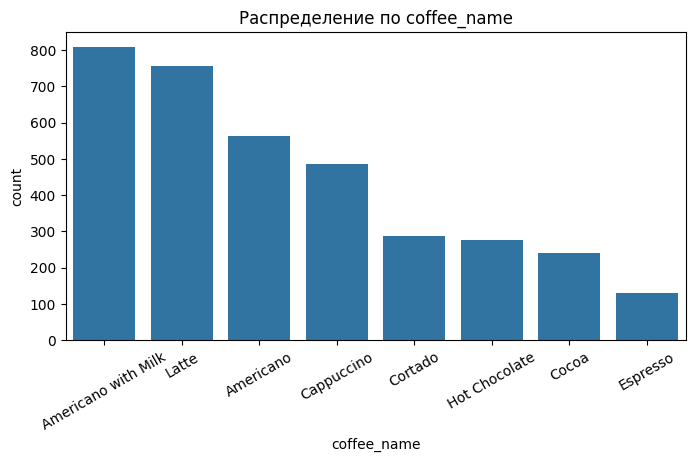

In [26]:
categorical_cols = ["cash_type", "coffee_name"]
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Распределение по {col}")
    plt.xticks(rotation=30)
    plt.show()

**задача ⏰**

Описать вывод графиков.
- в каких значениях концентрируентся переменная?
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина)

**Боксплот для числовой переменной:**

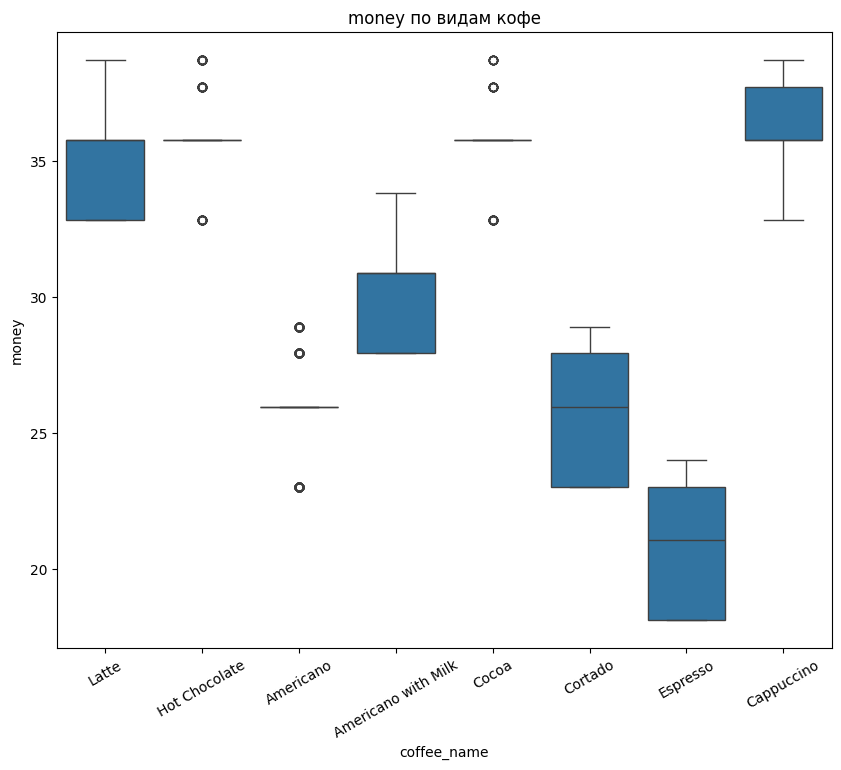

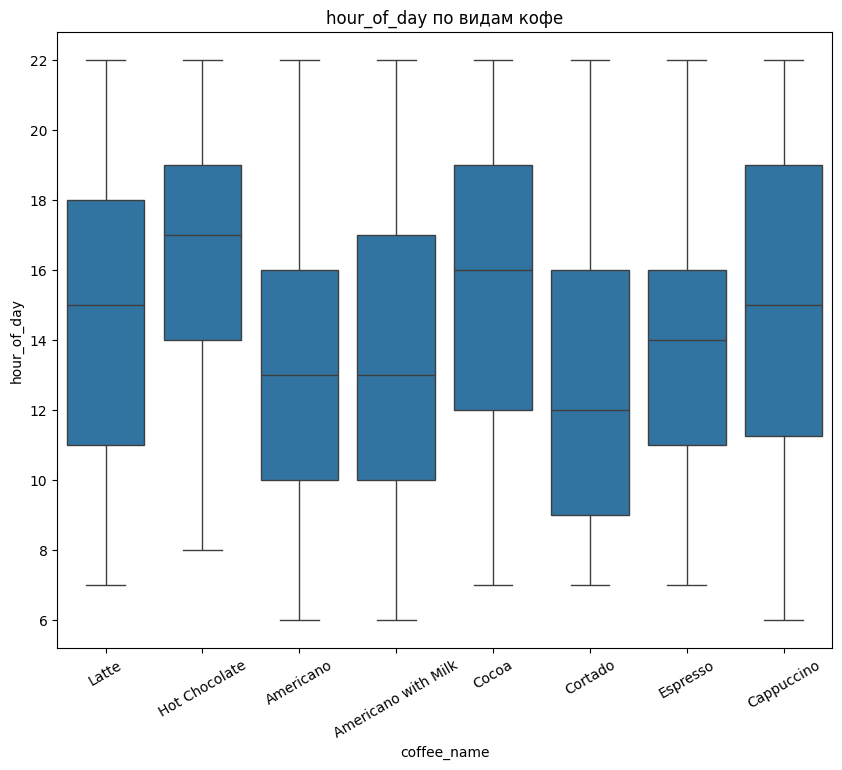

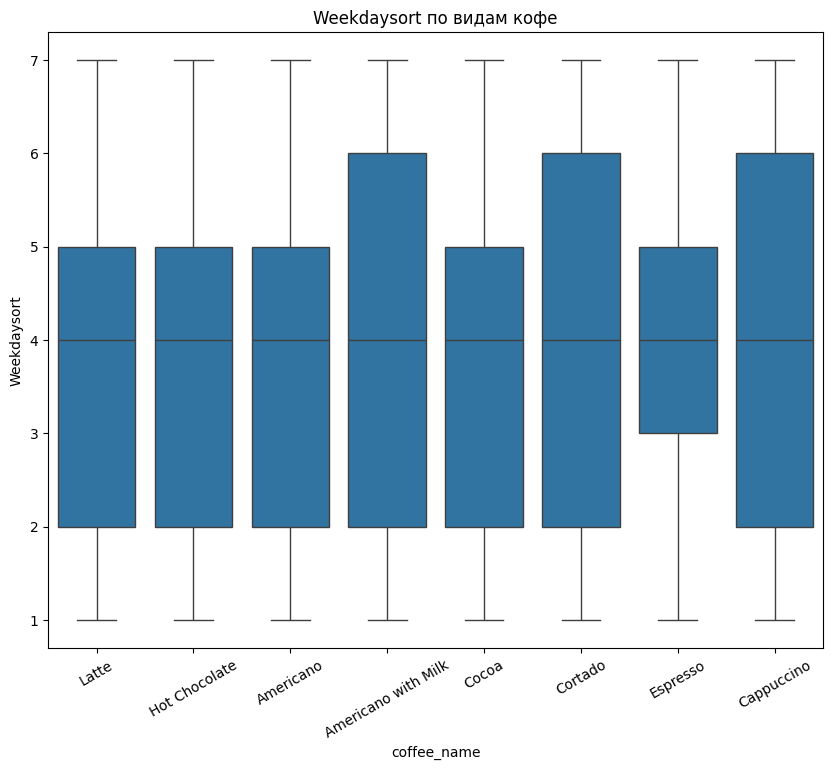

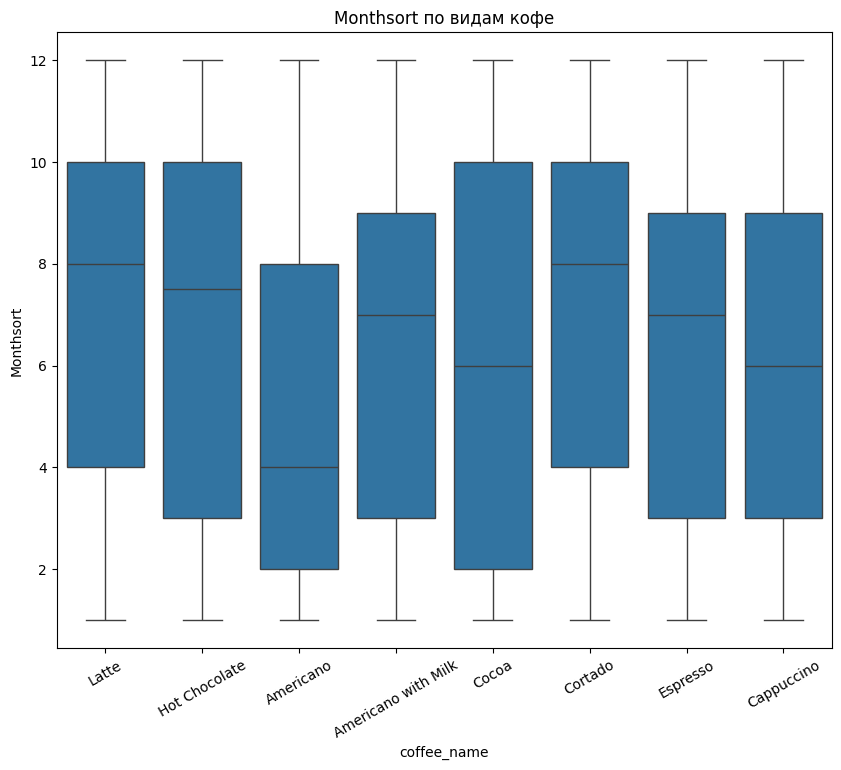

In [33]:
for col in numeric_cols:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x="coffee_name", y=col, data=df)
    plt.title(f"{col} по видам кофе")
    plt.xticks(rotation=30)
    plt.show()


Latte и Cappuccino выделяются самой высокой медианой стоимости.

Espresso — самый "дешёвый" напиток (самая низкая медиана).

Americano with Milk и Cocoa занимают средние позиции.

У большинства напитков (Latte, Hot Chocolate, Cappuccino и др.) наблюдаются выбросы сверху — это могут быть редкие крупные покупки.

Для всех видов кофе распределение заказов по месяцам довольно равномерно.

Медианы у всех напитков примерно совпадают, диапазон широкий (от 1-го до 12-го месяца).

Нет выраженных сезонных предпочтений для конкретного вида кофе: покупают весь ассортимент круглый год.



Заказы всех видов кофе осуществляются на протяжении всей недели, медианы у напитков примерно одинаковы.

У некоторых напитков (Cortado, Espresso, Cappuccino) медиана чуть ниже, возможно, их чаще берут в начале недели.

**задача ⏰**

Описать вывод графиков.
- Есть ли выбросы?
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина). Определить различия по медиане

Медианы для всех напитков находятся примерно в интервале 13–17 часов (дневное время).

Выбросы по времени есть для всех напитков: заказы происходят как утром, так и вечером.

Большинство заказов любого вида кофе — в дневные часы, но стандартный ассортимент покупают в течение всего дня.

**Постройте корреляционную матрицу для всех числовых переменных и визуализируйте её с помощью тепловой карты:**

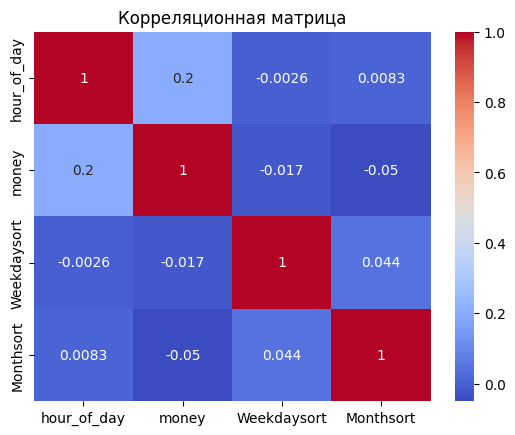

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

**задача ⏰**

Интерпертировать полученный результат:
- Какие переменные не коррелируют?
- Какие переменные имеют сильную положительную корреляцию?
- Какие переменные имеют сильную слабую корреляцию?

p.s. сильная корреляция считаем abs(corr_coef) >= 0.7

Нет сильно коррелирующих пар: Все значения коэффициентов корреляции ∣r∣<0.7, то есть среди числовых переменных датасета нет ни одной сильно положительной или отрицательной связи.

hour_of_day и money: Коэффициент корреляции 0.2 — это слабая положительная связь. Можно сделать вывод: чем позже время заказа, тем немного выше средний чек, но влияние очень незначительное.